Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

       director_name  num_movies
0                  0         104
1   Steven Spielberg          26
2        Woody Allen          22
3    Martin Scorsese          20
4     Clint Eastwood          20
5       Ridley Scott          17
6         Tim Burton          16
7  Steven Soderbergh          16
8          Spike Lee          16
9       Renny Harlin          15


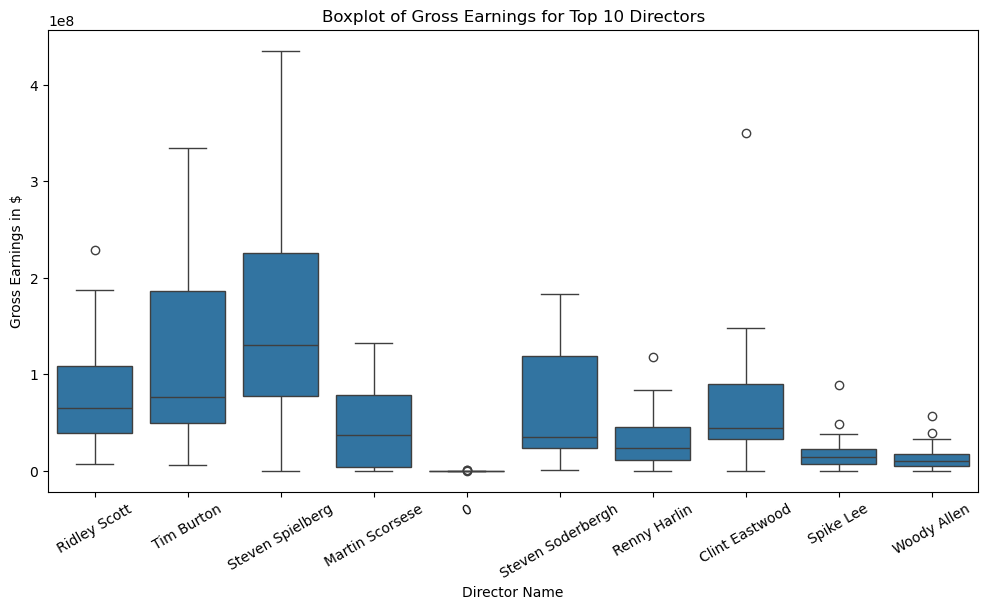

In [5]:
top_directors = data['director_name'].value_counts().reset_index()
top_directors.columns = ['director_name', 'num_movies']

# Sort the directors in order to get the top 10
top_directors = top_directors.sort_values(by='num_movies', ascending=False).head(10)

# logs the top 10 directors
print(top_directors)
top_directors_data = data[data['director_name'].isin(top_directors['director_name'])]

# Create a boxplot for their gross earnings
plt.figure(figsize=(12, 6))
sns.boxplot(x='director_name', y='gross', data=top_directors_data)
plt.title('Boxplot of Gross Earnings for Top 10 Directors')
plt.xticks(rotation=30)
plt.xlabel('Director Name')
plt.ylabel('Gross Earnings in $')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

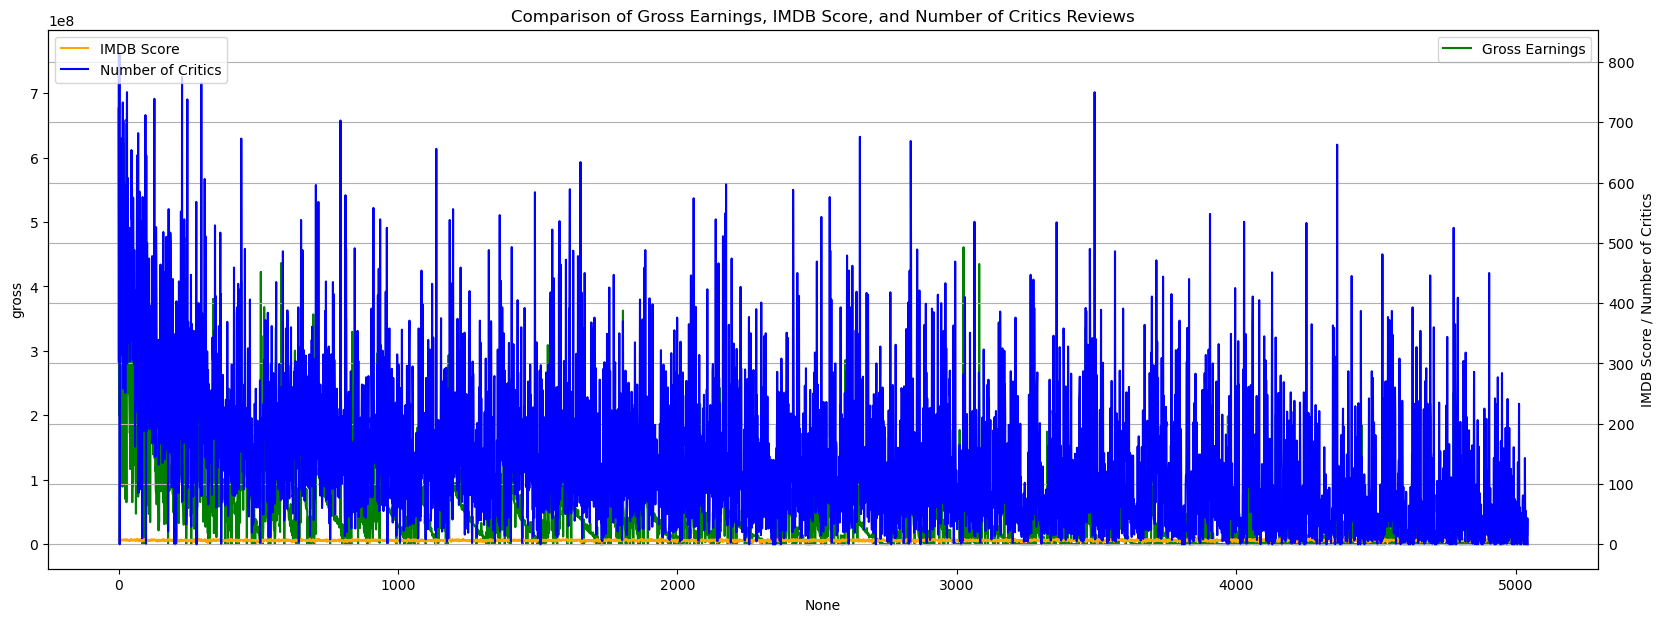

In [6]:

# Set the figure size
plt.figure(figsize=(20, 7))

# I cannot plot the three in a single y-axis since the gross have a millions of value since most of the movies have a gross of hundred to millions and imdb and critic reviews only have 1 to a few thousand
# what I did is create a secondary y-axis to manage the discrepancies between the data, the secondary y-axis is for the imdb score and num critic for reviews

# Create a primary y-axis for gross earnings since gross earning are typically in millions of dollars
sns.lineplot(data=data, x=data.index, y='gross', label='Gross Earnings', color='green')

# Create a secondary y-axis for IMDB score and num_critic_for_reviews since the value of the two are ranging ffrom 1 t0 a few thousand
ax2 = plt.gca().twinx() 

# Plot IMDB score on the secondary y-axis
sns.lineplot(data=data, x=data.index, y='imdb_score', label='IMDB Score', color='orange', ax=ax2)

# Plot num_critic_for_reviews on the secondary y-axis
sns.lineplot(data=data, x=data.index, y='num_critic_for_reviews', label='Number of Critics', color='blue', ax=ax2)

plt.title('Comparison of Gross Earnings, IMDB Score, and Number of Critics Reviews')
plt.xlabel('Index')
plt.ylabel('Gross Earnings')
ax2.set_ylabel('IMDB Score / Number of Critics')  # Label for the secondary y-axis
plt.legend(loc='upper left')  # Adjust legend location
plt.grid()

# Show the plot
plt.show()



## Compute Sales (Gross - Budget), add it as another column

In [7]:
# Computing the Sales (Gross - Budget)
data['Sales'] = data['gross'] - data['budget']

# Save the new column into the new CSV file
data.to_csv('movie_metadata_with_sales.csv', index=False)

print(data[['gross', 'budget', 'Sales']])

            gross       budget        Sales
0     760505847.0  237000000.0  523505847.0
1     309404152.0  300000000.0    9404152.0
2     200074175.0  245000000.0  -44925825.0
3     448130642.0  250000000.0  198130642.0
4             0.0          0.0          0.0
...           ...          ...          ...
5039          0.0          0.0          0.0
5040          0.0       1400.0      -1400.0
5041      10443.0          0.0      10443.0
5042      85222.0       1100.0      84122.0
5043          0.0          0.0          0.0

[5044 rows x 3 columns]


## Which directors garnered the most total sales?

In [8]:
data['Sales'] = data['gross'] - data['budget']

total_sales_by_director = data.groupby('director_name')['Sales'].sum().reset_index()

# Sort the results in descending order
total_sales_by_director = total_sales_by_director.sort_values(by='Sales', ascending=False)

print(total_sales_by_director.head(10))  


          director_name         Sales
2159   Steven Spielberg  2.451332e+09
765        George Lucas  1.386641e+09
923       James Cameron  1.199626e+09
1219        Joss Whedon  1.000887e+09
335      Chris Columbus  9.417076e+08
1787      Peter Jackson  9.009693e+08
2221         Tim Burton  8.242755e+08
374   Christopher Nolan  8.082276e+08
1158        Jon Favreau  7.693815e+08
695    Francis Lawrence  7.555020e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

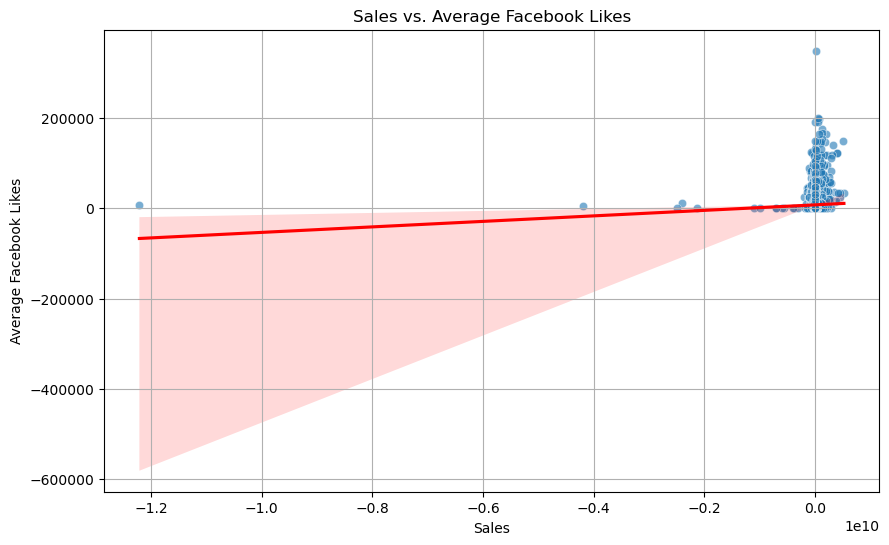

In [9]:
data = pd.read_csv('movie_metadata_with_sales.csv')

# scatter plot for the Sales and average likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Sales', y='movie_facebook_likes', alpha=0.6)

# creating regression line
sns.regplot(data=data, x='Sales', y='movie_facebook_likes', scatter=False, color='red')


plt.title('Sales vs. Average Facebook Likes')
plt.xlabel('Sales')
plt.ylabel('Average Facebook Likes')
plt.grid(True)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

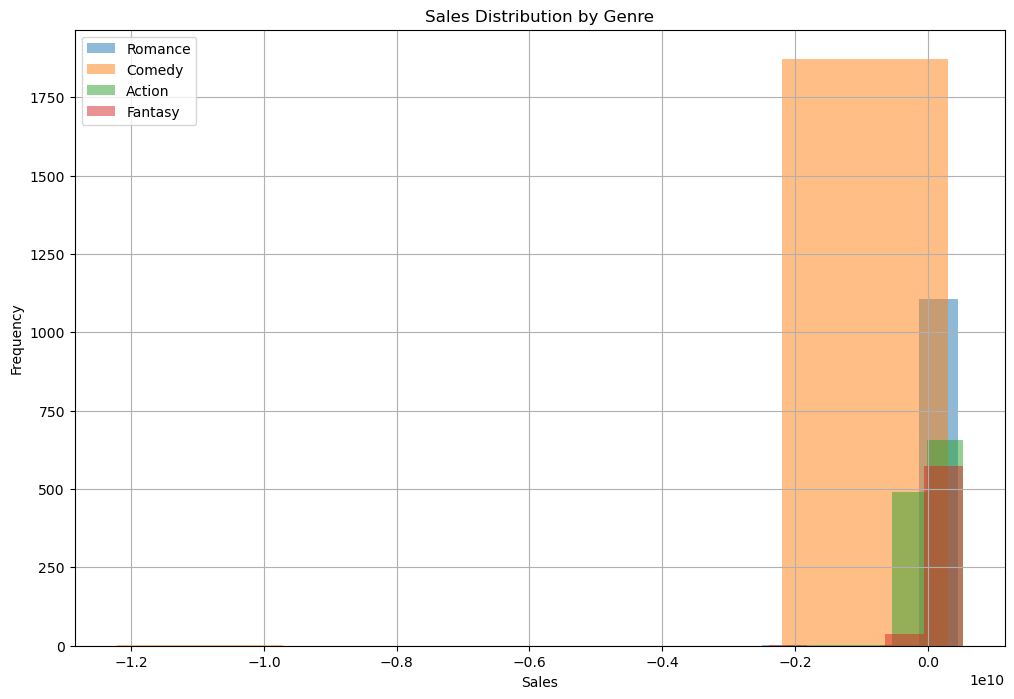

In [10]:

data = pd.read_csv('movie_metadata_with_sales.csv')

genres_of_interest = ['Romance', 'Comedy', 'Action', 'Fantasy']

# Create a figure for the histograms
plt.figure(figsize=(12, 8))

# Histogram
for genre in genres_of_interest:
    # Getting the sales of each of the genres
    sales_data = data[data['genres'].str.contains(genre, case=False, na=False)]['Sales']
    plt.hist(
        sales_data,
        bins=5,
        alpha=0.5,
        label=genre
    )


plt.title('Sales Distribution by Genre')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [11]:
data = pd.read_csv('movie_metadata_with_sales.csv')

# Calculate the average likes of the three actors
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

# Display the updated DataFrame with the new column
print(data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']].head())

   actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
0                  1000.0                   936.0                   855.0   
1                 40000.0                  5000.0                  1000.0   
2                 11000.0                   393.0                   161.0   
3                 27000.0                 23000.0                 23000.0   
4                   131.0                    12.0                     0.0   

   average_actor_likes  
0           930.333333  
1         15333.333333  
2          3851.333333  
3         24333.333333  
4            47.666667  


## Copying the whole dataframe

In [12]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [13]:

# Selecting the columns in which have numeric in them
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(numeric_cols)

# Normalize each column
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

# Display the normalized DataFrame
print(df[numeric_cols].head(-1))


Index(['Unnamed: 0', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Sales', 'average_actor_likes'],
      dtype='object')
      Unnamed: 0  num_critic_for_reviews  duration  director_facebook_likes  \
0       0.000000                0.889299  0.941799                 0.000000   
1       0.000198                0.371464  0.894180                 0.024478   
2       0.000397                0.740467  0.783069                 0.000000   
3       0.000595                1.000000  0.867725                 0.956522   
4       0.000793                0.000000  0.000000                 0.005696   
...          ...                     ...       ...                      ...   
503